<a href="https://colab.research.google.com/github/wcancado/hello-world/blob/master/econometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estudo de econometria, importando pandas e tranformando planilha em dataframe para sequencia de estudo

Dados no github

In [7]:
import pandas as pd
xlsx = pd.ExcelFile('alirenda.xlsx')
df=pd.read_excel(xlsx)
df.head()

,obs,YT,XT
0,1,52.25,258.3
1,2,58.32,343.1
2,3,81.79,425.0
3,4,119.90,467.5
4,5,125.80,482.9


criando função de Covariancia entre x e y

In [9]:
mqd = df['YT'].sum()/df['XT'].count()
print(mqd)
mp = df['YT'].sum()/df['YT'].count()
print(mp)

130.31300000000002
130.31300000000002


In [12]:
def covariancia(x,y):
  mex = x.sum()/x.count()
  mey = y.sum()/y.count()
  mxy=(x-mex)*(y-mey)
  return mxy.sum()/x.count()
covariancia(df['XT'],df['YT'])


4914.9384249999985

Criando função de estimadores mmq (b1 b2) usando nova tabela de teste

In [41]:
xlsxb = pd.ExcelFile('alirenda.xlsx')
df=pd.read_excel(xlsxb)
df.head()

def estimadores (x,y):
  n=x.count()
  sxy = x*y
  quadx=x*x
  bdois = (n*sxy.sum()-x.sum()*y.sum())/(n*quadx.sum()-x.sum()**2)
  bum = y.sum()/n - bdois*(x.sum()/n)
  return bum, bdois
estimadores(df['XT'],df['YT'])

(40.76755646557794, 0.12828860105218062)

Calculando a elasticidade da E(y) = despesa media em relação a x= renda media
a fórmula da elasticidade é dado por:bdois.x/E(y)

In [40]:
def elasticidade (x,y,px):# nesse caso o x e y são as váriaveis de x e y e px o valor para qual se quer achar a elasticidade
  bs= estimadores(x,y)
  elaxy= bs[1]*(px/y.mean())
  return elaxy
elasticidade(df['XT'],df['YT'],1000)

0.9844651036518276

predição

In [39]:
def predicao (x,y,px):
  bs= estimadores(x,y)
  pred = bs[0]+bs[1]*px
  return pred
predicao (df['XT'],df['YT'],df['XT'])

0      73.904502
1      84.783375
2      95.290212
3     100.742477
4     102.718122
5     103.333907
6     104.462847
7     107.400656
8     110.466753
9     111.159512
10    113.199301
11    116.239740
12    116.624606
13    118.677224
14    119.177549
15    121.717664
16    125.386718
17    125.951188
18    131.108389
19    131.185362
20    133.109692
21    133.135349
22    133.430413
23    133.430413
24    134.982705
25    136.021843
26    136.688943
27    138.690246
28    144.706981
29    145.771776
30    146.682625
31    147.670448
32    147.760250
33    158.549321
34    158.549321
35    160.024640
36    162.859818
37    170.852198
38    187.183337
39    188.889575
Name: XT, dtype: float64

Importando bibliotecas para analise mqo 
bibliotecas: matplotlib, scipy e statsmodels


```
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
```






In [0]:
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [14]:
print("Estatísticas descritivas de Renda e consumo:")
df['XT'].describe(), df['YT'].describe()

Estatísticas descritivas de Renda e consumo:


(count      40.00000
 mean      698.00000
 std       198.22695
 min       258.30000
 25%       560.62500
 50%       712.30000
 75%       820.27500
 max      1154.60000
 Name: XT, dtype: float64, count     40.000000
 mean     130.313000
 std       45.158568
 min       52.250000
 25%      100.365000
 50%      120.705000
 75%      147.685000
 max      269.030000
 Name: YT, dtype: float64)

histograma

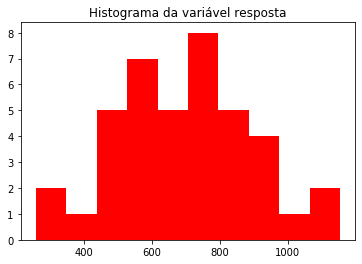

In [16]:
# Elabora um histograma
plt.hist(df['XT'], color='red', bins=10)
plt.title('Histograma da variável resposta')
plt.show()

Regressão e analise
exemplo
```
# This is formatted as code
reg = sm.ols(formula='y~x1+x2+x3+x4+categoria', data=dados).fit()
print(reg.summary())
```



In [17]:
reg=sm.ols(formula='YT~XT',data=df).fit()
print (reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     YT   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     17.65
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           0.000155
Time:                        01:20:19   Log-Likelihood:                -201.03
No. Observations:                  40   AIC:                             406.1
Df Residuals:                      38   BIC:                             409.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.7676     22.139      1.841      0.0

In [18]:
reg.predict()

array([ 73.90450212,  84.78337549,  95.29021191, 100.74247746,
       102.71812191, 103.3339072 , 104.46284689, 107.40065585,
       110.46675342, 111.15951186, 113.19930062, 116.23974046,
       116.62460627, 118.67722388, 119.17754943, 121.71766373,
       125.38671772, 125.95118756, 131.10838933, 131.18536249,
       133.1096915 , 133.13534922, 133.43041301, 133.43041301,
       134.98270508, 136.02184275, 136.68894347, 138.69024565,
       144.70698104, 145.77177643, 146.68262549, 147.67044772,
       147.76024974, 158.54932109, 158.54932109, 160.02464   ,
       162.85981809, 170.85219793, 187.18333685, 188.88957524])

histograma dos resíduos de regreção

modelo
```
# This is formatted as code
y_hat = reg.predict()
res = y - y_hat

plt.hist(res, color='orange', bins=15)
plt.title('Histograma dos resíduos da regressão')
plt.show() 
```



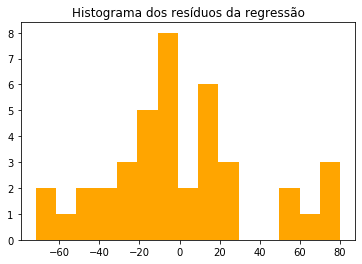

In [27]:
y_hat = reg.predict()
res= df['YT'] - y_hat

plt.hist(res, color='orange', bins=15)
plt.title('Histograma dos resíduos da regressão')
plt.show()

Plotando um grafico de dispersão

modelo

```
# This is formatted as code
plt.scatter(y=res, x=y_hat, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-10, xmax=15, color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()
```



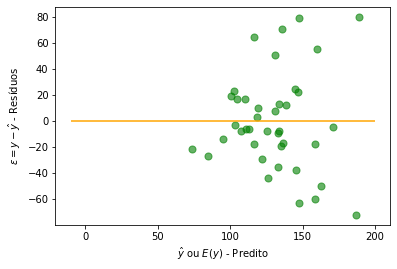

In [29]:
y_hat = predicao (df['XT'],df['YT'],df['XT'])
res= df['YT'] - y_hat

plt.scatter(y=res, x=y_hat, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-10, xmax=200, color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()

Coeficientes de regressão

modelo


```
# This is formatted as code
coefs = pd.DataFrame(reg.params)
coefs.columns = ['Coeficientes']
print(coefs)
```



In [30]:
coefs = pd.DataFrame(reg.params)
coefs.columns = ['Coeficientes']
print(coefs)

           Coeficientes
Intercept     40.767556
XT             0.128289


Traçando a reta de regressão:

modelo


```
plt.scatter(y=dados['y'], x=dados['x1'], color='blue', s=50, alpha=.5)
X_plot = sp.linspace(min(dados['x1']), max(dados['x1']), len(dados['x1']))
plt.plot(X_plot, X_plot*reg.params[1] + reg.params[0], color='r')
plt.ylim(-11,16)
plt.xlim(-2.5,3)
plt.title('Reta de regressão')
plt.ylabel('$y$ - Variável Dependente')
plt.xlabel('$x1$ - Preditor')
plt.show()
```



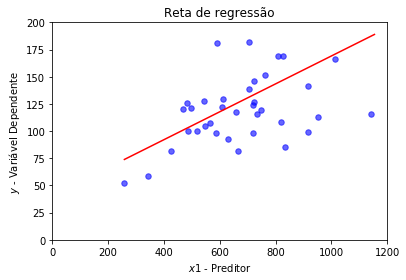

In [37]:
plt.scatter(y=df['YT'], x=df['XT'], color='blue', s=30, alpha=.6) #define a dispersão, cor, tamanho e transparencia
'''
A função linspace cria uma seqüência de números uniformemente espaçados entre os
 limites dados, opcionalmente incluindo o valor final (por default, esse é o 
 comportamento). Esta função vai devolver um arranjo unidimensional que pode 
 ser usado em qualquer operação que exija arranjos.

 '''
X_plot = sp.linspace(min(df['XT']), max(df['XT']), len(df['XT'])) #função numpy que define intervalos entre o inicio e fim de x
plt.plot(X_plot, X_plot*reg.params[1] + reg.params[0], color='r') #define a reta de regressão (X_plot=x e reta regressão = y)
plt.ylim(0,200)
plt.xlim(0,1200)
plt.title('Reta de regressão')
plt.ylabel('$y$ - Variável Dependente')
plt.xlabel('$x1$ - Preditor')
plt.show()
print = (X_plot)

Fazendo o mesmo gráfico de dispersão mas com parametros encontrados pela minha função coeficientes

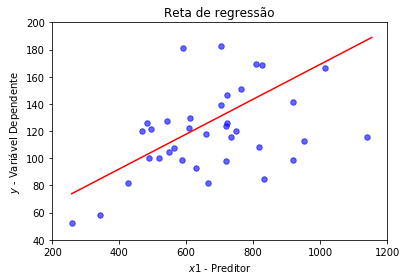

In [43]:
plt.scatter(y=df['YT'], x=df['XT'], color='blue', s=30, alpha=.6) #define a dispersão, cor, tamanho e transparencia
'''
A função linspace cria uma seqüência de números uniformemente espaçados entre os
 limites dados, opcionalmente incluindo o valor final (por default, esse é o 
 comportamento). Esta função vai devolver um arranjo unidimensional que pode 
 ser usado em qualquer operação que exija arranjos.

 '''
X_plot = sp.linspace(min(df['XT']), max(df['XT']), len(df['XT'])) #função numpy que define intervalos entre o inicio e fim de x
bs= estimadores(df['XT'],df['YT'])
plt.plot(X_plot, X_plot*bs[1] + bs[0], color='r') #define a reta de regressão (X_plot=x e reta regressão = y)
plt.ylim(40,200)
plt.xlim(200,1200)
plt.title('Reta de regressão')
plt.ylabel('$y$ - Variável Dependente')
plt.xlabel('$x1$ - Preditor')
plt.show()